# Tests

In [31]:
import svgwrite as svg
import math
import os


from reportlab.pdfgen.canvas import Canvas
from reportlab.lib.pagesizes import A4, landscape
from reportlab.lib.units import mm
from reportlab.graphics import renderPDF, renderPM
from reportlab.platypus import SimpleDocTemplate
from svglib.svglib import svg2rlg

In [99]:
data = [
    [0, 1, 2, 3],
    [3],
    [12, 14]
]

for i in range(0, 200):
    data.append([i % 15])

In [100]:
tmp_folder = 'tmp'

In [101]:
bars_per_row = math.floor(mm_width / mm_bar_width)
bars_per_row

104

In [103]:
mm_height_paper = 41
mm_height = 28
mm_width = 260
mm_line_height = 2
mm_note_radius = 1
mm_bar_width = 2.5
mm_padding_start = 4

factor = 5

bars_per_row = math.floor(mm_width / mm_bar_width)

for row in range (0, math.ceil(len(data) * mm_bar_width / mm_width)):

    d = svg.Drawing(os.path.join(tmp_folder, 'row_%s.svg' % row), size=((mm_width + mm_padding_start) * factor, mm_height_paper * factor))

    # Add Borders
    #d.add(svg.shapes.Rect((0, 0), ((mm_width + mm_padding_start) * factor, mm_height_paper * factor),  style="stroke:#7b7b7b;stroke-width:0.1; fill: none"))
    d.add(svg.shapes.Line((0, 0), ((mm_width + mm_padding_start) * factor,  0), style="stroke:#7b7b7b;stroke-width:0.1"))
    d.add(svg.shapes.Line((0,  mm_height_paper * factor), ((mm_width + mm_padding_start) * factor, mm_height_paper * factor), style="stroke:#7b7b7b;stroke-width:0.1"))

    transf = "translate(0, %s)" % ((mm_height_paper - mm_height) / 2 * factor)
    g = svg.container.Group(transform = transf)

    # Draw Lines
    for i in range(0, 15):
        g.add(svg.shapes.Line((0, i * mm_line_height * factor), (mm_width * factor, i * mm_line_height * factor), style="stroke:#000000;stroke-width:0.1"))

    # Draw Music
    for ibar, bar in enumerate(data[bars_per_row * row: bars_per_row * row + bars_per_row]):
        for note in bar:
            x = (mm_width * factor) - ibar * mm_bar_width * factor
            y = (14 - note) * mm_line_height * factor
            g.add(svg.shapes.Circle((x, y), r = (mm_note_radius * factor), style="fill: red"))



    d.add(g)
    d.save()
    




In [119]:
# Create PDF

padding_metween_rows = 0

pdf_row_height = (mm_height_paper + padding_metween_rows) * mm

my_canvas = Canvas(os.path.join(tmp_folder, 'test.pdf'), pagesize=landscape(A4))

for row in range(0, math.ceil(len(data) * mm_bar_width / mm_width)):
                
    drawing = svg2rlg(os.path.join(tmp_folder, 'row_%s.svg' % row))

    #Calc Scaling
    scale_x = mm / factor
    drawing.scale(scale_x, scale_x)


    renderPDF.draw(drawing, my_canvas, 50, A4[0] - (50 * mm) - (row * pdf_row_height))

my_canvas.save()

In [105]:
A4

(595.2755905511812, 841.8897637795277)

In [232]:
scale_x

0.5669291338582678

In [177]:
mm_width / mm_width * mm

2.834645669291339

In [217]:
(mm_width * factor) / (mm_width)

5.0

In [235]:
#doc = Canvas("test.pdf", pagesize=landscape(A4))

drawing = svg2rlg('test.svg')
drawing.width = mm_width
drawing.height = mm_height_paper
print(drawing.width, drawing.minWidth())
drawing.scale(0.5, 0.5)
    
doc = SimpleDocTemplate('test.pdf', pagesize=landscape(A4))

story = []
story.append(drawing)

doc.build(story)

#canvas.save()

260 260


In [122]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Entwicklung\_Projects\covidbarrel\env\Scripts\python.exe -m pip install --upgrade pip' command.


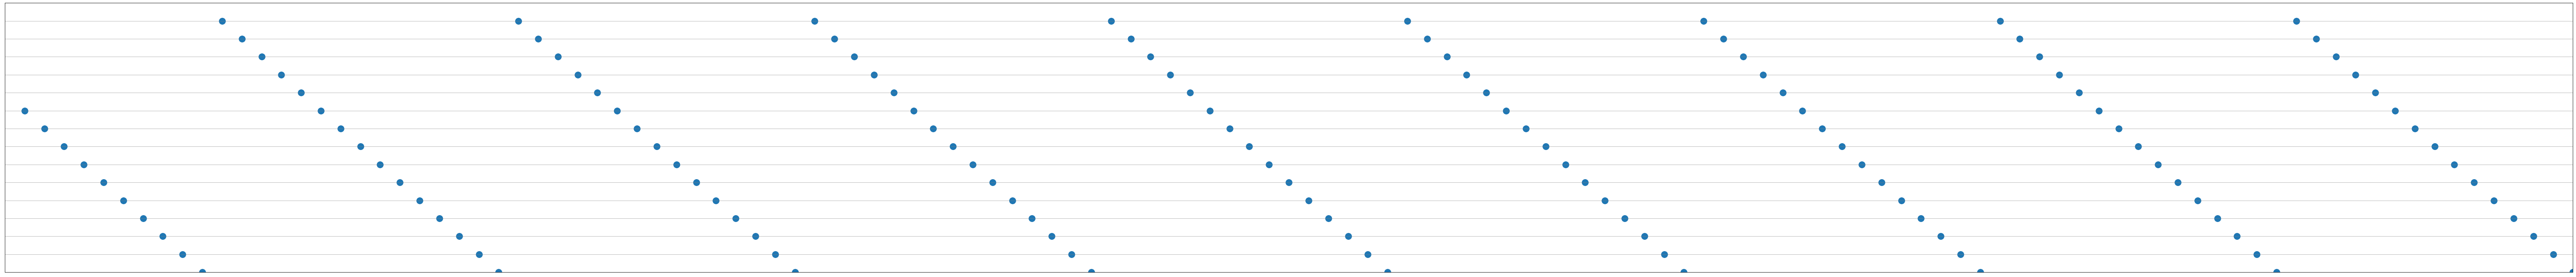

In [30]:

f = figure(num=None, figsize=(mm_width * cm, mm_height * cm), dpi=80, facecolor='w', edgecolor='k')
ax = f.add_subplot()

notes = math.floor(mm_width / mm_note_width)

y = []
for i in range(0, notes):
    y.append(i % 15)
    
x = []
for i in range(0, notes):
    x.append(i * -1)

    
ax.scatter(x = x, y = y, s = 200)
plt.ylim(0,15)
plt.xlim((mm_width / mm_note_width) * -1, 0)

for i in range(0, 15):
    plt.axhline(y=i, color='grey', linewidth=0.5, linestyle='-')
#plt.hlines(y=2, xmin = 0, xmax = notes, linewidth=2, color='r')

# Hide Labels
plt.xticks([])
plt.yticks([])

plt.savefig('image.jpg')

#plt.show()

<Figure size 432x288 with 0 Axes>

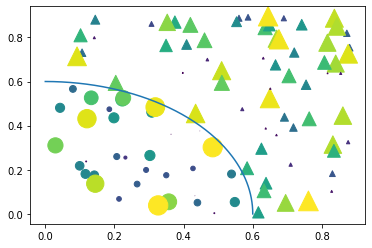

In [40]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()